In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vegas
import random as rand

Lambda = 10 ** 12
alpha = 1 / 132.184
m_W = 80.379
m_Z = 91.1876
m_e = 0.511E-3
m_m = 105.66E-3
m_h = 125.1
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e
ECM = m_h
hats = ECM ** 2 # all quantities are in GeV
pb_convert = 3.894E8 # conversion factor GeV^-2 -> pb
C_eB = 10 ** (20)
C_eW = 10 ** (20)
C_eB_conj = C_eB
C_eW_conj = C_eW
C_HD = 10 ** (20)
C_HWB = 10 ** (20)
v_alt = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))

def diff_decay(s, t, ml, v, CW, SW, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda):
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = (4 * e ** 2 * (m_h ** 4 + s ** 2)) / (t * u)
    struc_6 = 2 * 2 ** 0.5 * CW * e * m_h ** 2 * ml * (-(C_eB + C_eB_conj) * CW + (C_eW + C_eW_conj) * SW) / u
    struc_8 = 0
    return [N * (ml / v) ** 2 * struc_4, N * (1 / Lambda ** 2) * (ml / v) * struc_6, N *(1 / Lambda ** 4) * struc_8]

def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

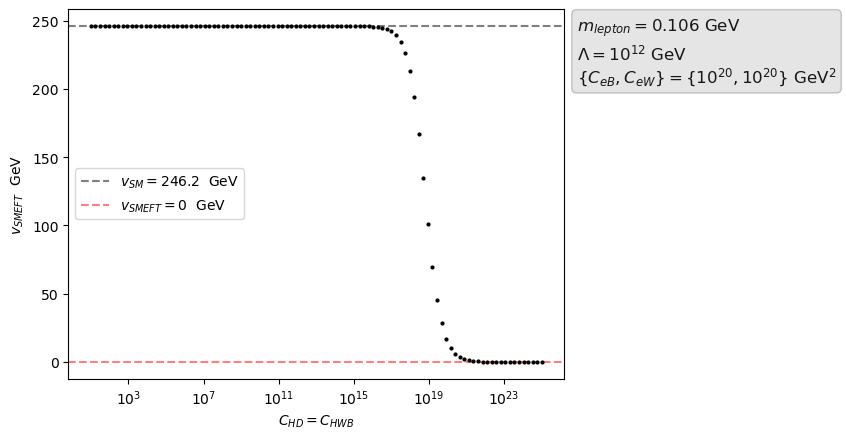

In [238]:
p_eB = 20
p_eW = 20
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_HDs = np.logspace(1,25,100)
C_HWBs = C_HDs
p = 12
Lambda = 10 ** p
ml = m_m
v_alts = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWBs + (cos / (4 * sin)) * C_HDs))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$} GeV$^{2}$'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

ax.errorbar(C_HDs, v_alts, markersize = 4, marker = '.', ls = 'None', color = 'black')
plt.xscale('log')
plt.xlabel('$C_{HD}=C_{HWB}$')
plt.ylabel('$v_{SMEFT}$  GeV')
plt.axhline(y=v, linestyle = '--', color = 'black', alpha = 0.5, label = '$v_{SM}='+str(round(v,1))+'$  GeV')
plt.axhline(y=0, linestyle = '--', color = 'red', alpha = 0.5, label = '$v_{SMEFT}='+str(0)+'$  GeV')
plt.legend()
plt.show()

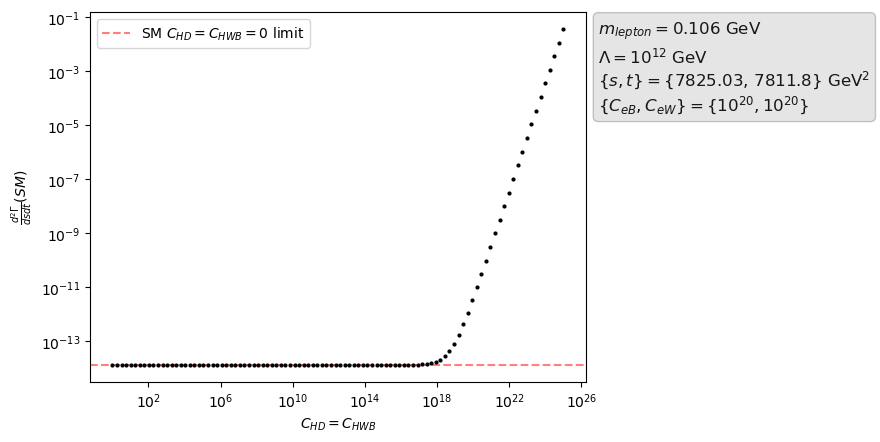

In [237]:
p_eB = 20
p_eW = 20
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_eB_conj = C_eB
C_eW_conj = C_eW
n = 0.5
m = 0.5
C_HDs = np.logspace(0,25,100)
C_HWBs = C_HDs
p = 12
Lambda = 10 ** p
ml = m_m
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
v_alts = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWBs + (cos / (4 * sin)) * C_HDs))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$s, t$}$=${' +str(round(s_pick, 2))+ ', '+str(round(t_pick, 2))+'} GeV$^{2}$',
    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$}'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.xscale('log')
plt.yscale('log')
ax.errorbar(C_HDs, diff_decay(s_pick, t_pick, ml, v_alts, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[0],
             markersize = 4,  marker = '.', ls = 'None', color = 'black')
plt.xlabel('$C_{HD}=C_{HWB}$')
plt.ylabel(r'$\frac{d^{2}\Gamma}{dsdt}(SM)$')
plt.axhline(y=diff_decay(s_pick, t_pick, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[0], 
            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=0$ limit')
plt.legend()
plt.show()

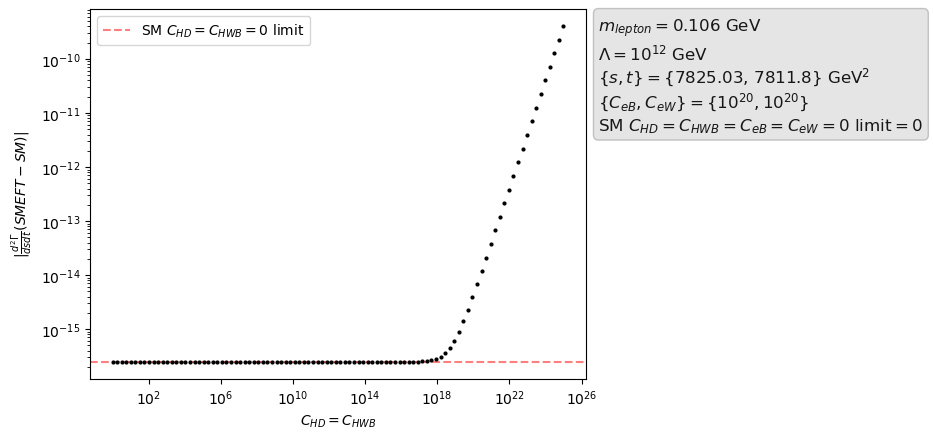

In [236]:
p_eB = 20
p_eW = 20
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_eB_conj = C_eB
C_eW_conj = C_eW
n = 0.5
m = 0.5
C_HDs = np.logspace(0,25,100)
#C_HDs = np.append(np.linspace(0, 1, 100), C_HDs)
C_HWBs = C_HDs
p = 12
Lambda = 10 ** p
ml = m_m
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
v_alts = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWBs + (cos / (4 * sin)) * C_HDs))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$s, t$}$=${' +str(round(s_pick, 2))+ ', '+str(round(t_pick, 2))+'} GeV$^{2}$',
    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$}',
    r'SM $C_{HD}=C_{HWB}=C_{eB}=C_{eW}=0$ limit$='+str(0)+'$'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.xscale('log')
plt.yscale('log')
ax.errorbar(C_HDs, -diff_decay(s_pick, t_pick, ml, v_alts, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[1],
             markersize = 4,  marker = '.', ls = 'None', color = 'black')
plt.xlabel('$C_{HD}=C_{HWB}$')
plt.ylabel(r'$|\frac{d^{2}\Gamma}{dsdt}(SMEFT-SM)|$')
plt.axhline(y=-diff_decay(s_pick, t_pick, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[1], 
            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=0$ limit')
#plt.axhline(y=-diff_decay(s_pick, t_pick, ml, v, cos, sin, 0, 0, 0, 0, Lambda)[1], 
#            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=C_{eB}=C_{eW}=0$ limit')
plt.legend()
plt.show()

In [2]:
#delta = 0.1
#s_min_fix = 4 * m_m ** 2 + delta
#s_max_fix = m_h ** 2 - delta
#t_min_fix = m_m ** 2
#t_max_fix = (m_h - m_m) ** 2
m = m_m
E_phot_min = 0
s_min_fix = 4 * m ** 2 #(0.1 * m_h) ** 2
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 10
nevals = 10 ** 4
bins = 100

def total_s(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI = np.zeros(bins, dtype=float) 
    dr = (s_max_fix - s_min_fix) / len(dI)
    dI_t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI)
    dI_cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_cos) 
    dI_cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_cos_alt)
    
    #if t_subs < t_max_fix and t_subs > t_min_fix:
    I = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * np.sum(diff_decay(s_subs, t_subs, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda))
        
    j = int((s_subs - s_min_fix) / dr)
    dI[j] = I
    j_t = int((t_subs - t_min_fix) / dr_t)
    dI_t[j_t] = I
    j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    dI_cos[j_cos] = I
    j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)
    dI_cos_alt[j_cos_alt] = I
        
    #else:
    #    I = 0
    #    print(I)
   
    return dict(I=I, dI=dI, dI_t=dI_t, dI_cos=dI_cos, dI_cos_alt=dI_cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_rate = total_decay_integ(total_s, nitn = nitns, neval = nevals)
print(total_rate.summary())
print('Sum(dI/I) =', sum(total_rate['dI']) / total_rate['I']) #should be 1

computed = total_rate['I'].mean
error = total_rate['I'].sdev
print('Vegas Cross-Section = '+str(computed)+' +/ '+str(error)+'')

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.000139(44)    0.000139(44)        0.00     1.00
  2   0.0001175(60)   0.0000672(17)       2.01     0.00
  3   0.0001288(69)   0.00007745(99)      2.69     0.00
  4   0.0001206(32)   0.00008397(71)      2.97     0.00
  5   0.0001224(23)   0.00008981(55)      3.39     0.00
  6   0.0001187(14)   0.00009346(45)      3.61     0.00
  7   0.0001203(11)   0.00009690(37)      3.69     0.00
  8   0.00012122(99)  0.00009966(32)      3.81     0.00
  9   0.00012084(86)  0.00010204(28)      3.98     0.00
 10   0.00012010(70)  0.00010421(25)      4.13     0.00

Sum(dI/I) = 1.0000082944(22)
Vegas Cross-Section = 0.00010420620843169012 +/ 2.468283196073873e-07


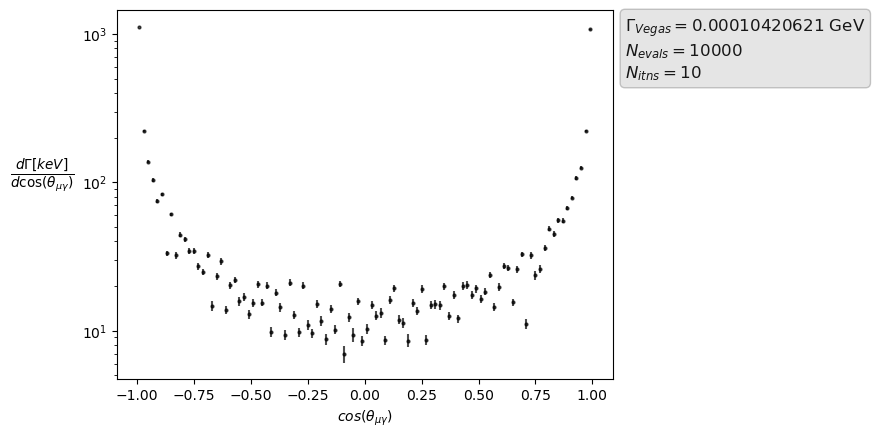

In [3]:
dIs = []
dI_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dIs += [total_rate['dI_cos'][i].mean]
    dI_errs += [total_rate['dI_cos'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dIs) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

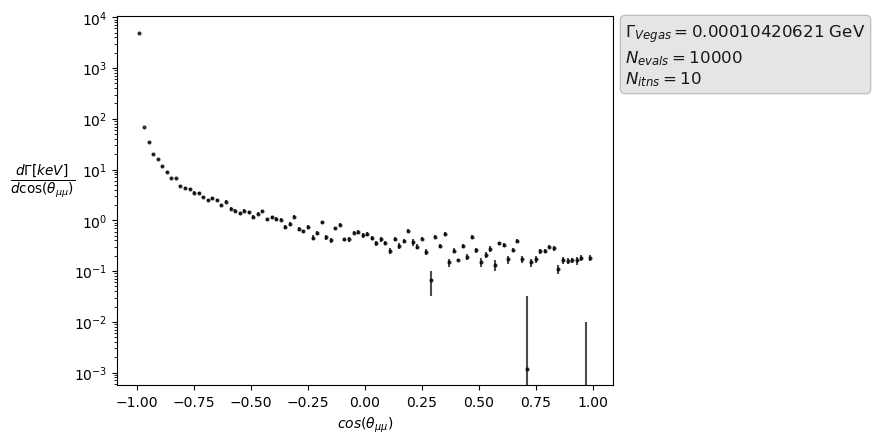

In [4]:
dIs = []
dI_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dIs += [total_rate['dI_cos_alt'][i].mean]
    dI_errs += [total_rate['dI_cos_alt'][i].sdev]

norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dIs) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

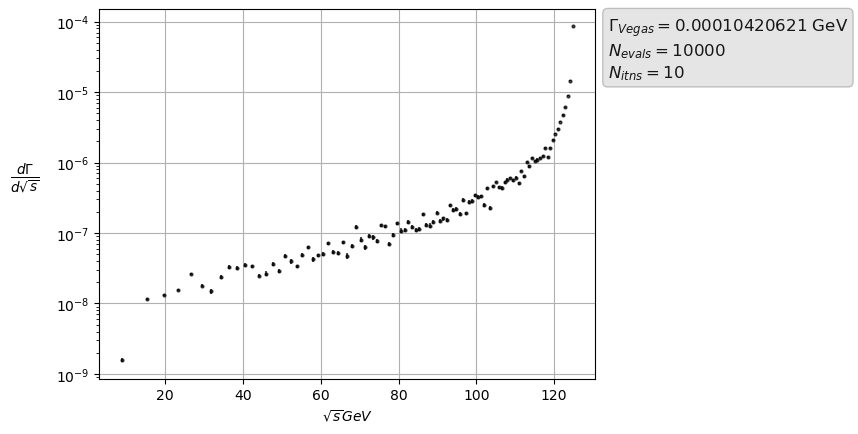

In [5]:
dIs = []
dI_errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dIs += [total_rate['dI'][i].mean / sdbins[i]]
    dI_errs += [total_rate['dI'][i].sdev / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dIs), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
#plt.ylim(10**-10, 10**-6)
#plt.xlim(0, 130)
plt.show()

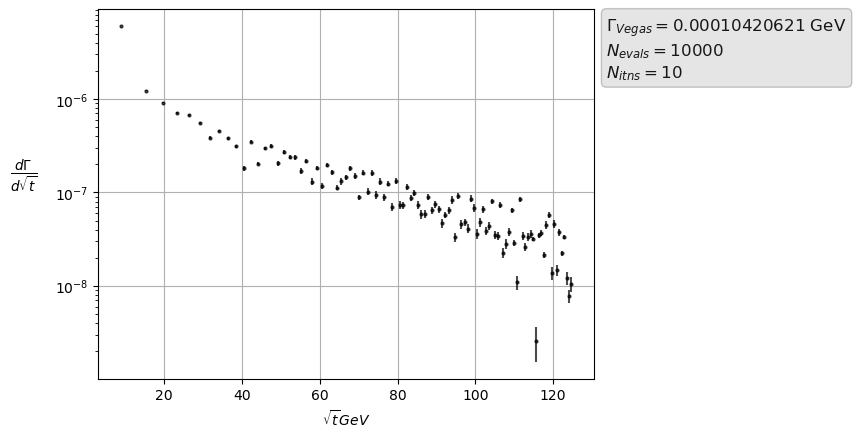

In [6]:
dI_ts = []
dI_terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_ts += [total_rate['dI_t'][i].mean / tdbins[i]]
    dI_terrs += [total_rate['dI_t'][i].sdev / tdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(10**-11, 10**-6)
#plt.xlim(0, 130)
plt.show()